## 数据创建，读写指南

任何数据分析项目的第一步都可能是从某个文件中读取数据，因此我们需要首先考虑这一点。 在本节中，我们将介绍有关创建pandas Series和DataFrame对象的练习

官方pandas文档的[IO Tools](http://pandas.pydata.org/pandas-docs/stable/io.html)部分提供了有关此主题的全面概述

首先我们来导入pandas库

In [10]:
import pandas as pd

创建数据
pandas中有两个核心对象：DataFrame和Series。

DataFrame是一个表。 它包含一系列单独的条目，每个条目都有一定的值。 每个条目对应一行（或记录）和一列。

例如，请考虑以下简单的DataFrame：

In [ ]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

在此示例中，“0，No”条目的值为131.“0，Yes”条目的值为50，依此类推。

DataFrame条目不限于整数。 例如，这是一个DataFrame，其值为str字符串：

In [ ]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})

我们使用pd.DataFrame构造函数来生成这些DataFrame对象。创建新对象的语法是初始化一个字典，其键是列名（本例中为Bob和Sue），其值是条目列表。 这是构建新DataFrame的标准方法，也是你最容易遇到的方法。

字典列表的构造函数为列标签分配值，但只使用0（0,1,2,3，...）的递增计数作为行标签。 有时候这没关系，但我们经常会想要自己分配这些行标签。

DataFrame中使用的行标签列表称为索引。 我们可以在构造函数中使用索引参数为其赋值：

In [ ]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

相比之下，Series是一系列数据值。 如果DataFrame是表，则Series是列表。 事实上，你可以创建一个Series只有一个列表：

In [ ]:
pd.Series([1, 2, 3, 4, 5])

Series本质上是DataFrame的单个列。 因此，你可以使用索引参数以与之前相同的方式为Series分配列值。 但是，Series没有列名，它只有一个总名称：

In [ ]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

Series和DataFrame密切相关。 将DataFrame视为实际上只是一堆Series“粘合在一起”是有帮助的。 我们将在本教程的下一部分中看到更多内容。

## 读常用文件csv

能够手动创建DataFrame和Series非常方便。 但是，在大多数情况下，我们实际上不会手动创建自己的数据，我们将使用已经存在的数据。

数据可以以多种不同的形式和格式存储。 到目前为止，其中最基本的是简单的CSV文件。 当你打开CSV文件时，会看到如下所示的内容：

csv
Product A,Product B,Product C,
30,21,9,
35,34,1,
41,11,11

CSV文件是由逗号分隔的表

现在让我们把我们的玩具数据集放在一边，看看当我们将它读入DataFrame时真正的数据集是什么样的。 

在这个案例里，我们将查看澳大利亚墨尔本的房价数据。 

点击这里 [下载](https://vitu.oss-cn-hangzhou.aliyuncs.com/input/melb_data.csv) 数据集

我们再把csv文件上传到vitu的数据集空间里

![my picture](https://vitu.oss-cn-hangzhou.aliyuncs.com/pics/vitu-learn-3.png)

我们将使用read_csv函数将数据读入DataFrame。 这样做：

In [ ]:
melbourne_data = pd.read_csv('melb_data.csv') 

我们可以使用shape属性来检查生成的DataFrame的大小：

In [ ]:
melbourne_data.shape

因此，我们的新DataFrame有1万3千多条记录，分为21个不同的列。

我们可以使用head命令检查结果DataFrame的内容，该命令抓取前五行：

In [ ]:
melbourne_data.head()

pandas read_csv函数功能丰富，可以指定30多个可选参数。 例如，你可以在创建数据集时候使用csv文件某列作为内置索引，而pandas默认不会自动获取。 为了使pandas将该列用于索引（而不是从头开始创建新索引），我们可以指定并使用index_col。

In [ ]:
melbourne_data = pd.read_csv('melb_data.csv', index_col=0)
melbourne_data.head()

## 读常用文件excel

让我们看看你可能会遇到的更多数据类型。

首先是古老的Excel电子表格。 Excel文件（XLS或XLST）将自身组织为一系列命名工作表。 每张Sheet基本上都是一张表格。 因此，要将数据加载到pandas中，我们需要一个额外的参数：感兴趣的工作表的名称。



点击这里 [下载](https://vitu.oss-cn-hangzhou.aliyuncs.com/input/xls-files-all.zip) 数据集

本地打开如下

![my picture](https://vitu.oss-cn-hangzhou.aliyuncs.com/pics/vitu-learn-22.png)

我们再把xls文件上传到vitu的数据集空间里

![my picture](https://vitu.oss-cn-hangzhou.aliyuncs.com/pics/vitu-learn-3.png)

用pandas的read_excel读取：

In [ ]:
wic = pd.read_excel("WICAgencies2013ytd.xls", 
                    sheet_name='Total Women')
wic.head()

正如你在此示例中所看到的，Excel文件通常不像CSV文件那样格式化。电子表格允许（并鼓励）创建人类可读但不是机器可读的注释和字段。

所以在我们使用这个特定的数据集之前，我们需要稍微清理一下。我们将在下一节中看到如何执行此操作。

## 读常用文件sqlite

现在，让我们转到另一种常见的数据格式：sqlite。

点击这里 [下载](https://vitu.oss-cn-hangzhou.aliyuncs.com/input/Salaries.sqlite) sqlite数据集

我们再把sqlite文件上传到vitu的数据集空间里

![my picture](https://vitu.oss-cn-hangzhou.aliyuncs.com/pics/vitu-learn-3.png)


连接到SQL数据库需要比从Excel文件读取更多的思考。首先，你需要创建一个连接器

pandas不会自动为你执行此操作，因为有许多不同类型的SQL数据库，每个都有自己的连接器。因此，对于SQLite数据库（Vitu唯一支持的类型），你需要首先执行以下操作（使用Python附带的sqlite3库）：

In [ ]:
import sqlite3
conn = sqlite3.connect("Salaries.sqlite")

你需要做的另一件事是编写SQL语句。 在内部，SQL数据库的运行方式完全不同。 但是，在外部，它们都提供相同的API，即“结构化查询语言”（或简称SQL ...）。

所以，不用多说，以下是从SQLite中查看数据库里有多少表格

In [ ]:
tables = pd.read_sql_query("SELECT * FROM sqlite_master where type='table'", conn)
tables

以下是从SQLite中查看Salaries表里的所有数据

In [ ]:
salaries = pd.read_sql_query("SELECT * FROM Salaries", conn)
conn.close()

In [ ]:
salaries.head()

## 如何写入常用文件

将数据写入文件通常比从一个文件中读取数据更容易，因为pandas会为你处理转换的麻烦。

我们将再次使用CSV文件。 read_csv（读取我们的数据）的反义词是to_csv，写入它。 使用CSV文件很简单：

In [ ]:
melbourne_data.head().to_csv('melb_data_head.csv')

要写回Excel文件，需要再次使用to_excel和sheet_name：

In [ ]:
wic.head().to_excel('wic_head.xls', sheet_name='Total Women')

最后，要写入到SQLite数据库，我们要将数据输入的数据库中提供表的名称，以及连接器：

In [ ]:
conn = sqlite3.connect("salaries_head.sqlite")
salaries.head().to_sql("salaries", conn)
conn.close()

无痛完成读写！

URLError: <urlopen error [WinError 10054] 远程主机强迫关闭了一个现有的连接。>

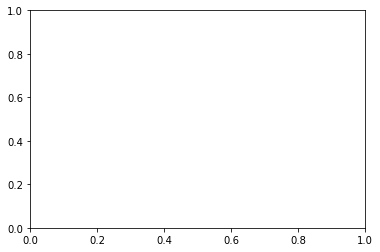

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


# Initialize Figure and Axes object
fig, ax = plt.subplots()

# Load in data
tips =   pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

# Create violinplot
ax.violinplot(tips["total_bill"], vert=False)

# Show the plot
plt.show()